## Flow
Initialize Network.
Forward Propagate.
Back Propagate Error.
Train Network.
Predict.
Seeds Dataset Case Study

### initialize_network() 
This function creates a new neural network. 
It accepts three parameters, the number of inputs, the number of neurons to have in the hidden layer and the number of outputs.

In [ ]:
# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network

In each Hidden Layer the function creates n_hidden neurons and each neuron in the hidden layer has n_inputs + 1 weights, one for each input and an additional one for the bias.

In the output layer that connects to the hidden layer there are n_outputs neurons, each with n_hidden + 1 weights. This means that each neuron in the output layer connects to each neuron in the hidden layer.

### Example

In [1]:
from random import seed
from random import random

# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network

seed(1)
network = initialize_network(2, 1, 2)
for layer in network:
	print(layer)

[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}]
[{'weights': [0.2550690257394217, 0.49543508709194095]}, {'weights': [0.4494910647887381, 0.651592972722763]}]


The hidden layer has one neuron with 2 input weights and the bias value. The output layer has 2 neurons, each with 1 weight and  the bias value.

##  Forward Propagate
The output of the neural network is computed by propagating the input through each layer until the output layer outputs its values.
Forward propagation involves the following parts:

Neuron Activation.
Neuron Transfer.
Forward Propagation

### Neuron Activation

Neuron activation is calculated as the weighted sum of the inputs. Much like linear regression
            activation = sum(weight_i * input_i) + bias
            
weight is a network weight, input is an input, i is the index of a weight or an input and bias is a special weight that 

In [ ]:
# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

## Neuron Transfer

Once a neuron is activated, we transfer the activation to see the neuron output value.
1. Sigmoid
2. Tanh
3. RelU

In [ ]:
# Transfer neuron activation
def transfer(activation):
	return 1.0 / (1.0 + exp(-activation))

## Forward Propogate

Each neuron’s output value is stored in the neuron with the name ‘output‘. collect the outputs for a layer in an array named new_inputs that becomes the array inputs and is used as inputs for the next layer.

In [ ]:
# Forward propagate input to a network output
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs

### Combining it all together

In [ ]:
from math import exp

# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

# Transfer neuron activation
def transfer(activation):
	return 1.0 / (1.0 + exp(-activation))

# Forward propagate input to a network output
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs

# test forward propagation
network = [[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}],
		[{'weights': [0.2550690257394217, 0.49543508709194095]}, {'weights': [0.4494910647887381, 0.651592972722763]}]]
row = [1, 0, None]
output = forward_propagate(network, row)
print(output)

## Backpropagation of the Error
Error is calculated between the expected outputs and the outputs forward propagated from the network. These errors are then propagated backward through the network from the output layer to the hidden layer, assigning blame for the error and updating weights as they go.
Two part process
1. Transfer Derivative.
2. Error Backpropagation.

In [ ]:
# Calculate the derivative of an neuron output
def transfer_derivative(output):
	return output * (1.0 - output)

The error for a given neuron can be calculated as follows:

For the output layer:
    error = (output - expected) * transfer_derivative(output)

Where expected is the expected output value for the neuron, output is the output value for the neuron and transfer_derivative() calculates the slope of the neuron’s output value

For hidden layers: The back-propagated error is accumulated and then used to determine the error for the neuron in the hidden layer
    error = (weight_k * error_j) * transfer_derivative(output)
    
Where error_j is the error signal from the jth neuron in the output layer, weight_k is the weight that connects the kth neuron to the current neuron and output is the output for the current neuron.


In [ ]:
# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(neuron['output'] - expected[j])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

the error signal for neurons in the hidden layer is accumulated from neurons in the output layer where the hidden neuron number j is also the index of the neuron’s weight in the output layer neuron[‘weights’][j].

In [ ]:
# Calculate the derivative of an neuron output
def transfer_derivative(output):
	return output * (1.0 - output)

# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(neuron['output'] - expected[j])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

# test backpropagation of error
network = [[{'output': 0.7105668883115941, 'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}],
		[{'output': 0.6213859615555266, 'weights': [0.2550690257394217, 0.49543508709194095]}, {'output': 0.6573693455986976, 'weights': [0.4494910647887381, 0.651592972722763]}]]
expected = [0, 1]
backward_propagate_error(network, expected)
for layer in network:
	print(layer)

## Train the network

The network is trained using stochastic gradient descent involving multiple iterations of exposing a training dataset to the network and for each row of data forward propagating the inputs, backpropagating the error and updating the network weights.

Step 1:
Update Weights
Once errors are calculated for each neuron in the network via the back propagation method above, they can be used to update weights.
    weight = weight - learning_rate * error * input
    
Where weight is a given weight, learning_rate is a parameter that you must specify, error is the error calculated by the backpropagation procedure for the neuron and input is the input value that caused the error. The same procedure can be used for updating the bias weight except that the weight is 1.


Learning rate controls how much to change the weight to correct for the error. For example, a value of 0.1 will update the weight 10% of the amount that it possibly could be updated. Small learning rates are preferred that cause slower learning over a large number of training iterations. This increases the likelihood of the network finding a good set of weights across all layers rather than the fastest set of weights that minimize error (called premature convergence).

In [ ]:
# Update network weights with error
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] -= l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] -= l_rate * neuron['delta']

## Training
This involves first looping for a fixed number of epochs and within each epoch updating the network for each row in the training dataset.

Because updates are made for each training pattern, this type of learning is called online learning. If errors were accumulated across an epoch before updating the weights, this is called batch learning or batch gradient descent.

In [ ]:
# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
	for epoch in range(n_epoch):
		sum_error = 0
		for row in train:
			outputs = forward_propagate(network, row)
			expected = [0 for i in range(n_outputs)]
			expected[row[-1]] = 1
			sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
			backward_propagate_error(network, expected)
			update_weights(network, row, l_rate)
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))

The expected number of output values is used to transform class values in the training data into a one hot encoding. That is a binary vector with one column for each class value to match the output of the network. This is required to calculate the error for the output layer

In [ ]:
from math import exp
from random import seed
from random import random

# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network

# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

# Transfer neuron activation
def transfer(activation):
	return 1.0 / (1.0 + exp(-activation))

# Forward propagate input to a network output
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs

# Calculate the derivative of an neuron output
def transfer_derivative(output):
	return output * (1.0 - output)

# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(neuron['output'] - expected[j])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

# Update network weights with error
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] -= l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] -= l_rate * neuron['delta']

# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
	for epoch in range(n_epoch):
		sum_error = 0
		for row in train:
			outputs = forward_propagate(network, row)
			expected = [0 for i in range(n_outputs)]
			expected[row[-1]] = 1
			sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
			backward_propagate_error(network, expected)
			update_weights(network, row, l_rate)
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))

# Test training backprop algorithm
seed(1)
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
n_inputs = len(dataset[0]) - 1
n_outputs = len(set([row[-1] for row in dataset]))
network = initialize_network(n_inputs, 2, n_outputs)
train_network(network, dataset, 0.5, 20, n_outputs)
for layer in network:
	print(layer)

## Prediction



In [ ]:
# Make a prediction with a network
def predict(network, row):
	outputs = forward_propagate(network, row)
	return outputs.index(max(outputs))

## Combined code

In [2]:
from math import exp

# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

# Transfer neuron activation
def transfer(activation):
	return 1.0 / (1.0 + exp(-activation))

# Forward propagate input to a network output
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs

# Make a prediction with a network
def predict(network, row):
	outputs = forward_propagate(network, row)
	return outputs.index(max(outputs))

# Test making predictions with the network
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
network = [[{'weights': [-1.482313569067226, 1.8308790073202204, 1.078381922048799]}, {'weights': [0.23244990332399884, 0.3621998343835864, 0.40289821191094327]}],
	[{'weights': [2.5001872433501404, 0.7887233511355132, -1.1026649757805829]}, {'weights': [-2.429350576245497, 0.8357651039198697, 1.0699217181280656]}]]
for row in dataset:
	prediction = predict(network, row)
	print('Expected=%d, Got=%d' % (row[-1], prediction))

Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1


# Example with Seed Dataset

Measurements of geometrical properties of kernels belonging to three different varieties of wheat. A soft X-ray technique and GRAINS package were used to construct all seven, real-valued attributes.
The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

The data set can be used for the tasks of classification and cluster analysis.

To construct the data, seven geometric parameters of wheat kernels were measured: 
1. area A, 
2. perimeter P, 
3. compactness C = 4*pi*A/P^2, 
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
All of these parameters were real-valued continuous.

In [17]:
import pandas as pd
import random
filename = './data/seeds_dataset.txt'
columns_of_data_set = ['area_A',
'perimeter_P',
'compactness_C',
'length_of_kernel',
'width_of_kernel',
'asymmetry_coefficient',
'length_of_kernel_groove', 
'wheat_variety']
dataset_seeds = pd.read_csv(filename, names=columns_of_data_set, sep=',')
dataset_seeds.head(150)

area_A  perimeter_P  compactness_C  length_of_kernel  width_of_kernel  \
0     15.26        14.84         0.8710             5.763            3.312   
1     14.88        14.57         0.8811             5.554            3.333   
2     14.29        14.09         0.9050             5.291            3.337   
3     13.84        13.94         0.8955             5.324            3.379   
4     16.14        14.99         0.9034             5.658            3.562   
..      ...          ...            ...               ...              ...   
145   11.21        13.13         0.8167             5.279            2.687   
146   11.43        13.13         0.8335             5.176            2.719   
147   12.49        13.46         0.8658             5.267            2.967   
148   12.70        13.71         0.8491             5.386            2.911   
149   10.79        12.93         0.8107             5.317            2.648   

     asymmetry_coefficient  length_of_kernel_groove  wheat_variety  
0                    2.221                    5.220              1  
1                    1.018                    4.956              1  
2                    2.699                    4.825              1  
3                    2.259                    4.805              1  
4                    1.355                    5.175              1  
..                     ...                      ...            ...  
145                  6.169                    5.275              3  
146                  2.221                    5.132              3  
147                  4.421                    5.002              3  
148                  3.260                    5.316              3  
149                  5.462                    5.194              3  

[150 rows x 8 columns]

In [19]:
x_line =[x for x in range(0,dataset_seeds.shape[0])]
y = [random.sample(range(0, dataset_seeds.shape[0]),210)]
plt.figure(figsize=(5,5))
plt.scatter(x_line,y, c=dataset_seeds.wheat_variety.values.tolist())

In [1]:
# Backprop on the Seeds Dataset
from random import seed
from random import randrange
from random import random
from csv import reader
from math import exp

# Load a data file
def load_file(filename):
	dataset = list()
	with open(filename, 'r') as file:
		file_reader = reader(file)
		for row in file_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())

# Convert string column to integer
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup

# Find the min and max values for each column
def dataset_minmax(dataset):
	minmax = list()
	stats = [[min(column), max(column)] for column in zip(*dataset)]
	return stats

# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
	for row in dataset:
		for i in range(len(row)-1):
			row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for i in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		accuracy = accuracy_metric(actual, predicted)
		scores.append(accuracy)
	return scores

# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

# Transfer neuron activation
def transfer(activation):
	return 1.0 / (1.0 + exp(-activation))

# Forward propagate input to a network output
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs

# Calculate the derivative of an neuron output
def transfer_derivative(output):
	return output * (1.0 - output)

# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(neuron['output'] - expected[j])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

# Update network weights with error
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] -= l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] -= l_rate * neuron['delta']

# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
	for epoch in range(n_epoch):
		for row in train:
			outputs = forward_propagate(network, row)
			expected = [0 for i in range(n_outputs)]
			expected[row[-1]] = 1
			backward_propagate_error(network, expected)
			update_weights(network, row, l_rate)

# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network

# Make a prediction with a network
def predict(network, row):
	outputs = forward_propagate(network, row)
	return outputs.index(max(outputs))

# Backpropagation Algorithm With Stochastic Gradient Descent
def back_propagation(train, test, l_rate, n_epoch, n_hidden):
	n_inputs = len(train[0]) - 1
	n_outputs = len(set([row[-1] for row in train]))
	network = initialize_network(n_inputs, n_hidden, n_outputs)
	train_network(network, train, l_rate, n_epoch, n_outputs)
	networks_master.append(network)
	predictions = list()
	for row in test:
		prediction = predict(network, row)
		predictions.append(prediction)
	return(predictions)

# Test Backprop on Seeds dataset
seed(1)
# load and prepare data
filename = './data/seeds_dataset.txt'
dataset = load_file(filename)
for i in range(len(dataset[0])-1):
	str_column_to_float(dataset, i)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)
# normalize input variables
minmax = dataset_minmax(dataset)
normalize_dataset(dataset, minmax)
networks_master = list()
# evaluate algorithm
n_folds = 5
l_rate = 0.3
n_epoch = 10
n_hidden = 1
scores = evaluate_algorithm(dataset, back_propagation, n_folds, l_rate, n_epoch, n_hidden)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [66.66666666666666, 76.19047619047619, 78.57142857142857, 61.904761904761905, 76.19047619047619]
Mean Accuracy: 71.905%


The dataset_minmax() and normalize_dataset() helper functions were used to normalize the input values.
evaluate the algorithm using k-fold cross-validation with 5 folds. This means that 201/5=40.2 or 40 records will be in each fold. We will use the helper functions evaluate_algorithm() to evaluate the algorithm with cross-validation and accuracy_metric() to calculate the accuracy of predictions.

A new function named back_propagation() was developed to manage the application of the Backpropagation algorithm, first initializing a network, training it on the training dataset and then using the trained network to make predictions on a test dataset.

In [71]:
scores

[73.80952380952381,
 78.57142857142857,
 78.57142857142857,
 61.904761904761905,
 76.19047619047619]

In [2]:
ind= max(enumerate(scores),key=lambda x: x[1])[0]
scores[ind]

78.57142857142857

In [3]:
predictions = list() 
test_set = list()
actuals = list()
for row in dataset:
	row_copy = list(row)
	actuals.append(row[-1])
	test_set.append(row_copy)
	row_copy[-1] = None
for row in test_set:
	prediction = predict(networks_master[ind], row)
	predictions.append(prediction)

print("actuals: ", actuals)
print("predictions: ", predictions)

actuals:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
predictions:  [2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 2, 1, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 2, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [4]:
correct_predictions=[1  if x == predictions[ind]  else 0 for ind, x in enumerate(actuals) ]
correct_predictions


[0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [5]:
import collections
counter = collections.Counter(correct_predictions)
counter

Counter({1: 158, 0: 52})

In [6]:
import matplotlib.pyplot as plt

In [7]:
x_line =[x for x in range(0,len(dataset))]
#import random
y = [random.sample(range(0, len(dataset)),210)]
plt.figure(figsize=(5,5))
plt.scatter(x_line,y, c=actuals)



In [8]:
# 10 epochs 1 layer
plt.figure(figsize=(5,5))
plt.scatter(x_line,y, c=correct_predictions)
plt.legend(["incorrect"])

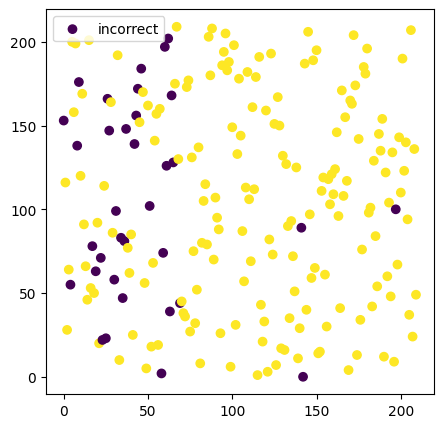

In [100]:
# 100 epochs 1 layers
plt.figure(figsize=(5,5))
plt.scatter(x_line,y, c=correct_predictions)
plt.legend(["incorrect"])

In [105]:
# 10 epochs 2 layers
plt.figure(figsize=(5,5))
plt.scatter(x_line,y, c=correct_predictions)
plt.legend(["incorrect"])

In [121]:
# 100 epochs 2 layers
plt.figure(figsize=(5,5))
plt.scatter(x_line,y, c=correct_predictions)
plt.legend(["correct"])

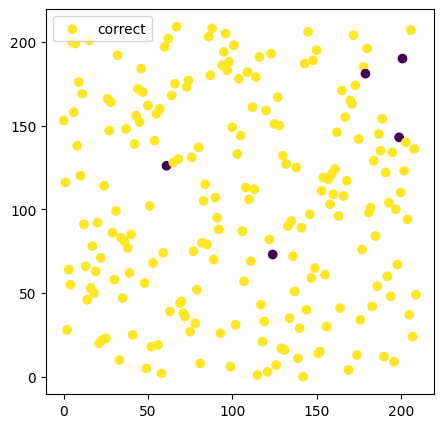

In [116]:
# 500 epochs 2 layers
plt.figure(figsize=(5,5))
plt.scatter(x_line,y, c=correct_predictions)
plt.legend(["correct"])